In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pl.read_parquet(source="/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW.parquet/", use_pyarrow=True)
df

: 

: 

In [3]:
import pandas as pd
import os
import glob

# Folder containing your TSV files
folder_path = '/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG'

# Pattern to match TSV files
file_pattern = os.path.join(folder_path, '*.tsv')

# Initialize an empty DataFrame
final_df = list()

# Loop through each TSV file
for file_path in sorted(glob.glob(file_pattern)):
    print(file_path)
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t', header=None, names=[
        'Concatenated', 'CHROM_1', 'POS_1', 'Dot', 'REF_1', 'ALT_1', 'Quality', 'Dot2', 
        'Info', 'Format', 'Genotype', 'CellID', 'CHROM_2', 'POS_2', 'REF_2', 'ALT_2', 
        'SampleGenotype', 'SampleID'
    ])
    sample_name = file_path.split("_")[-1].replace(".tsv", "")

    # Extract sample names from 'SampleID' and create a new column for them
    df['SampleName'] = sample_name

    final_df.append(df)

    # Concatenate with the final DataFrame
final_df = pd.concat(final_df)

# Sort the final DataFrame by 'CellID'
final_df_sorted = final_df.sort_values('CellID')

# Path to save the Parquet file
parquet_path = '/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW.parquet'

# Check if the directory exists, if not, create it
os.makedirs(parquet_path, exist_ok=True)

# Write the final DataFrame to a Parquet file, partitioned by 'CellID'
final_df_sorted.to_parquet(
    path=parquet_path, 
    partition_cols=['CellID'], 
    index=False
)


/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW_HG00238.tsv
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW_HG00342.tsv
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW_HG00479.tsv
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW_HG00623.tsv
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW_HG00702.tsv
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW_HG00705.tsv
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW_HG00739.tsv
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW_HG01800.tsv
/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/COMPARING_STRANDSEQ_TO_1KG/LanexHGSVCpool2NEW_HG02014.tsv


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [22]:
df.iloc[0].Info

'DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4=0,0,0,1;MQ=60;FQ=-29.9912'

In [15]:
tmp_df = df.loc[df["SampleGenotype"] != "1"]
tmp_df

,Concatenated,CHROM_1,POS_1,Dot,REF_1,ALT_1,Quality,Dot2,Info,Format,Genotype,CellID,CHROM_2,POS_2,REF_2,ALT_2,SampleGenotype,SampleID
0,chr10_100038589_T_C,chr10,100038589,.,T,C,6.98265,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4...,GT:PL,"1/1:36,3,0",LanexHGSVCpool2NEWiTRUE5E54.vcf.gz,chr10,100038589,T,C,0|1,HG00238
1,chr10_100038589_T_C,chr10,100038589,.,T,C,6.98265,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4...,GT:PL,"1/1:36,3,0",LanexHGSVCpool2NEWiTRUE5E54.vcf.gz,chr10,100038589,T,C,0|1,HG00342
2,chr10_100038589_T_C,chr10,100038589,.,T,C,6.98265,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4...,GT:PL,"1/1:36,3,0",LanexHGSVCpool2NEWiTRUE5E54.vcf.gz,chr10,100038589,T,C,0|1,NA10861
3,chr10_100038589_T_C,chr10,100038589,.,T,C,6.98265,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4...,GT:PL,"1/1:36,3,0",LanexHGSVCpool2NEWiTRUE5E54.vcf.gz,chr10,100038589,T,C,0|1,NA18879
4,chr10_100038589_T_C,chr10,100038589,.,T,C,6.98265,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4...,GT:PL,"1/1:36,3,0",LanexHGSVCpool2NEWiTRUE5E54.vcf.gz,chr10,100038589,T,C,0|1,NA19451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907212,chrX_99970915_T_G,chrX,99970915,.,T,G,6.98265,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4...,GT:PL,"1/1:36,3,0",LanexHGSVCpool2NEWiTRU3C11.vcf.gz,chrX,99970915,T,G,1|1,HG03897
17907213,chrX_99970915_T_G,chrX,99970915,.,T,G,6.98265,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4...,GT:PL,"1/1:36,3,0",LanexHGSVCpool2NEWiTRU3C11.vcf.gz,chrX,99970915,T,G,1|1,NA10861
17907214,chrX_99970915_T_G,chrX,99970915,.,T,G,6.98265,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4...,GT:PL,"1/1:36,3,0",LanexHGSVCpool2NEWiTRU3C11.vcf.gz,chrX,99970915,T,G,1|1,NA18566
17907215,chrX_99970915_T_G,chrX,99970915,.,T,G,6.98265,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AF1=1;AC1=2;DP4...,GT:PL,"1/1:36,3,0",LanexHGSVCpool2NEWiTRU3C11.vcf.gz,chrX,99970915,T,G,1|1,NA18907


In [16]:
# Group by 'CellID' and 'SampleID' and count occurrences
grouped_counts = tmp_df.groupby(['CellID', 'SampleID']).size().reset_index(name='Count')
grouped_counts


,CellID,SampleID,Count
0,LanexHGSVCpool2NEWiTRU1A03.vcf.gz,HG00238,1996
1,LanexHGSVCpool2NEWiTRU1A03.vcf.gz,HG00342,1947
2,LanexHGSVCpool2NEWiTRU1A03.vcf.gz,HG00479,2061
3,LanexHGSVCpool2NEWiTRU1A03.vcf.gz,HG00623,2064
4,LanexHGSVCpool2NEWiTRU1A03.vcf.gz,HG00702,2042
...,...,...,...
10642,LanexHGSVCpool2NEWiTRUE7G95.vcf.gz,NA19455,1131
10643,LanexHGSVCpool2NEWiTRUE7G95.vcf.gz,NA19788,1235
10644,LanexHGSVCpool2NEWiTRUE7G95.vcf.gz,NA20525,1247
10645,LanexHGSVCpool2NEWiTRUE7G95.vcf.gz,NA20861,1240


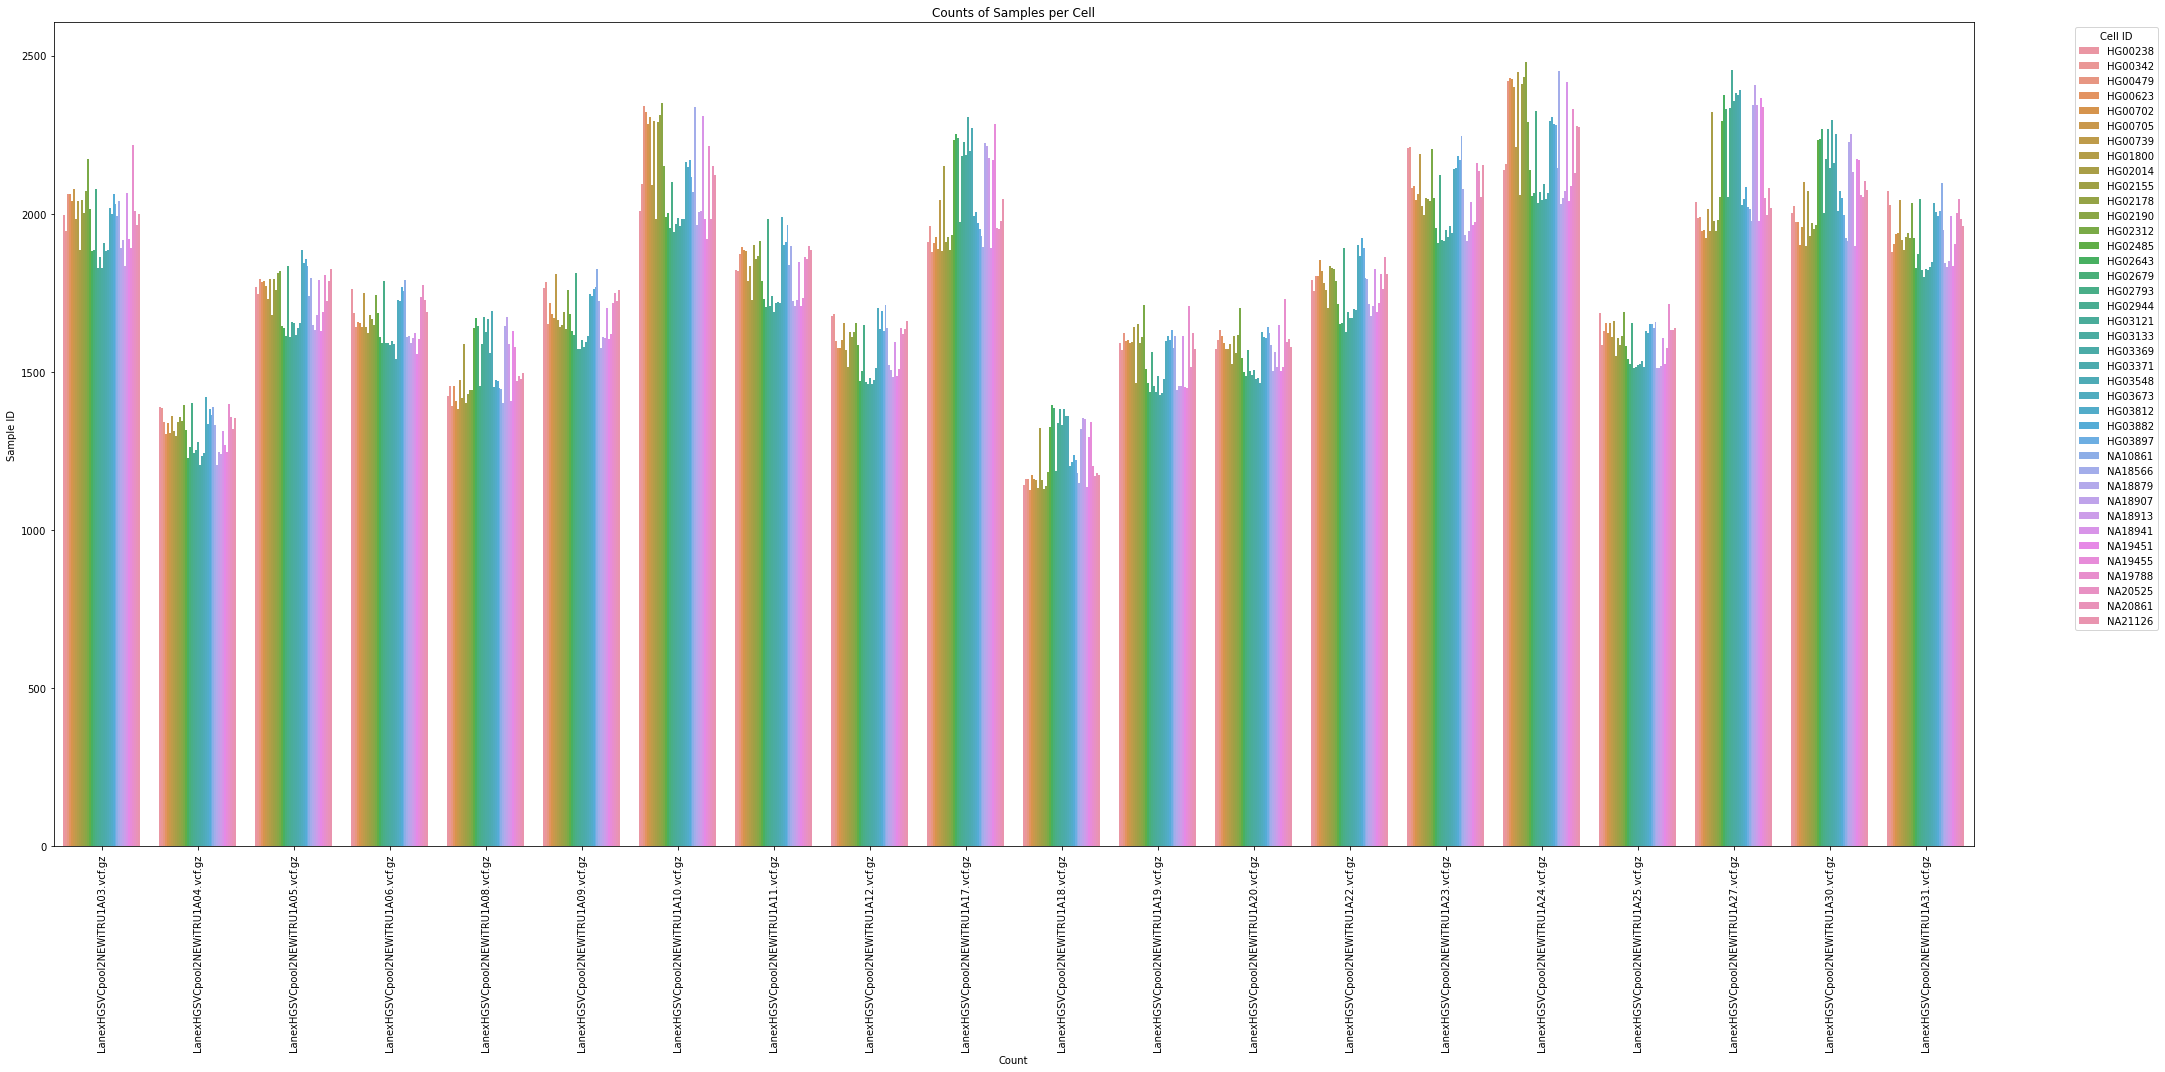

In [17]:
# Create a plot
plt.figure(figsize=(30, 15))
sns.barplot(data=grouped_counts.loc[grouped_counts["CellID"].isin(grouped_counts["CellID"].unique().tolist()[:20])], x='CellID', y='Count', hue='SampleID')

# Improve the plot
plt.xticks(rotation=90)
plt.ylabel('Sample ID')
plt.xlabel('Count')
plt.title('Counts of Samples per Cell')
plt.legend(title='Cell ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()